##Getting started

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, img_as_float

Since images are basically 2D arrays, lets start by learning about different ways to create Python arrays.

Image generated using GPT -

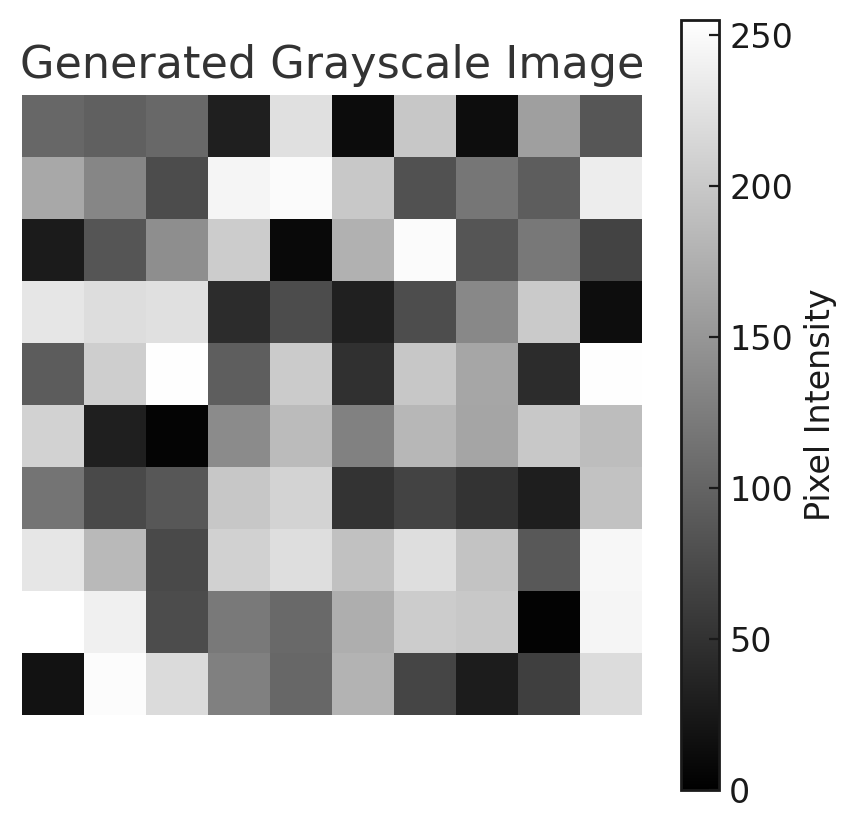



## Defining arrays using Python Lists

At first we try out the built in list type object of Python -

In [ ]:
x = [1, 2, 4, 5, 7]
print(x)

#Here x is a 1D array implemented as a Python list

[1, 2, 4, 5, 7]


In image processing we have to manipulate the image array. Lets consider the simplest form of manipulation - adding a constant value to the array.


We try the format  -->  list + int, and see what happens


In [ ]:
#for i in range
x = x + 4
print(x)

5


As you can see that it has returned an error. So we have to iterate through all the data points and add the constant to them -

In [ ]:
for i in range(len(x)):
  x[i] = x[i] + 4
print(x)

[ 9 10 12 13 15]


This time it worked.

## Defining arrays using NumPy ndarray

But in practice, we do not use Python lists as they need a lot of memory allocation due to their "flexibility".

Instead we will work with NumPy arrays that are more memory efficient and can be processed more efficiently in the future pipelines that we will work on.

In [ ]:
#This is how we define numpy arrays
x = np.array([1, 2, 4, 5, 7])
print(x)

[1 2 4 5 7]


Remember the problem we faced while working with lists? We couldn't add list object and int object together. This happens because the objects in the lists are never bounded to a specific object type as a list is designed to contain multiple heterogenous object types at the same time.

However, NumPy forces all the objects in an array to belong to the same data type. Since, by default our NumPy array 'x' contains integers, we can add integers directly to the array.

In [ ]:
x = x + 4
print(x)

[ 5  6  8  9 11]


The same code works now without returning error.

So far we have worked with 1D arrays. However, mainstream images are 2D at the very least (grayscale) and 3D in most cases (RGB). So, let us define a 2D array now -

In [ ]:
# declare an array of 2 rows, 3 columns
x = np.array([[2,3,4],[5,6,14]])

In [ ]:
print(x)

[[ 2  3  4]
 [ 5  6 14]]


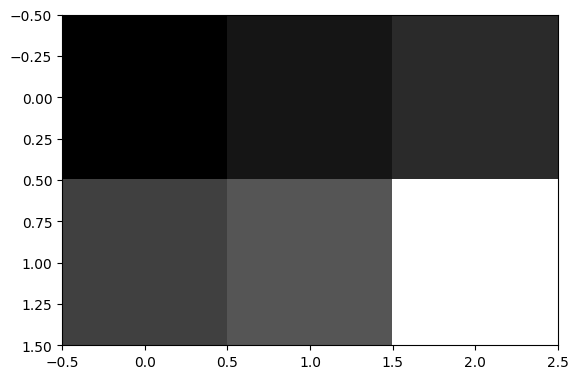

In [ ]:
plt.imshow(x, cmap='gray')


The cmap = 'gray' ensures that the plot is done in grayscale.

Now try making a 2D array that looks like this -


\begin{bmatrix}
2 & 3 & 4\\
5 & 6 & 7
\end{bmatrix}

Print the matrix and view it using imshow(). Use gray color map (cmap = 'gray')

## Array slicing

In later classes you will learn more about the importance of neigborhood processing. Neighborhood processing requires you to select a specific region from the image. We can do so by array slicing. In simpler terms array slicing refers to selecting specific data points from an array.

In [ ]:
# declare an array of 2 rows, 3 columns
x = np.array([[2,3,4],[5,6,14]])

x[1,:] #[index number,value]

array([ 5,  6, 14])

Here we have selected the (1+1)th row and all the columns.

A more extreme case of slicing is picking only one entry from the whole array -

In [ ]:
x = np.array([1, 2, 4, 5, 7, 12, -55, 77, 10])

In [ ]:
print(x[3])

5


In [ ]:
print(x[-5])

7


To find a specific entry in a multidimensional array, you have to define all the index values.

For example, for the 2D array -

\begin{bmatrix}
2 \ 3 \ 4 \\
5 \ 6 \ 7 \\
\end{bmatrix}

if we want to select the value 4, we have to access the 1st row (index = 1 -1 = 0) and 3rd column (index = 3 -1 = 2)

We can achieve this by -

In [ ]:
x = np.array([[2,3,4],[5,6,7]])
print(x)
print(x[0][-1])
print(x[0,-1])

[[2 3 4]
 [5 6 7]]
4
4


In [ ]:
x = np.array([[[2,3,4],[5,6,7]],[[2,3,4],[5,6,7]]])
print(x)

[[[2 3 4]
  [5 6 7]]

 [[2 3 4]
  [5 6 7]]]


During slicing, the start is inclusive and the end is exclusive.

x[start:end] = [x[start], x[start+1], ....., x[end-1]]

In [ ]:
x = np.array([1, 2, 4, 5, 7, 8, 9, 12])
print(x[1:-1])

[2 4 5 7 8 9]


You can further fine tune the slicing by including a step size -

x[start:end:step] = x[start], x[start+step], x[start+2*step],.... x[end-1]

In [ ]:
x[1:-1:3]

array([2, 7])

In case you do not mention the step size, a default size of 1 is used.

In [ ]:
print(x[0:5])

[1 2 4 5 7]


In [ ]:
print(x[1:4:2])

[2 5]


If the start index is left blank, we start from the very start of the original array. Same with the end value. If the end index is left blank, we continue slicing till the very end of the original array.

In summary -

`x[start:end]`

`x[start:end:step]`

`x[::]`

start is not specified, 0

end is not specified, len(x)

step is not specified, 1

In [ ]:
print(x[::1])

[ 1  2  4  5  7  8  9 12]


A negative step value can be used to traverse the original array in a reverse order.

In [ ]:
print(x[::-1])

[12  9  8  7  5  4  2  1]


In [ ]:
print(x[::-2])

[12  8  5  2]


In [ ]:
x = np.array([[2,3,4],[5,6,7]])
print(x)

[[2 3 4]
 [5 6 7]]


If your indices are out of bounds of your available data, what happens? Run the next cell to find out -

In [ ]:
x[20:35][100:120]

array([], shape=(0, 3), dtype=int64)

In [ ]:
print(x[:,::2])

[[2 4]
 [5 7]]


## Boolean indexing

Sometimes, you might want to select certain pixels (data points) whose values are above a certain threshold and perform some operations on them.

For example in grayscale to binary image conversion, we select the pixels with gray values above a certain threshold, and assign a pixel value of 1 to them while keeping all the rest of the pixels equal to 0.

Now the question is, how can we select these pixels that meet our thresholding criteria? We can do this by Boolean indexing. Check out the code given below -

In [ ]:
# boolean indexing

x = np.array([2, 1, -5, -4, 4, 5])

In [ ]:
# to select the values of x greater than 0

print(x[x>0])

[2 1 4 5]


By building on our current intuition x>0 must give us the indices. So lets check what x>0 returns -

In [ ]:
print(x>0)

[ True  True False False  True  True]


These are the Boolean indices. When passed through as indices to an array this will return the values only when the indices are True.

Some extra examples -

In [ ]:
x*(x>0)

array([2, 1, 0, 0, 4, 5])

In [ ]:
index = [False, False, True, True, False, False]

In [ ]:
x[index]

array([-5, -4])

In [ ]:
index = x < 0

In [ ]:
index

array([False, False,  True,  True, False, False])

In [ ]:
x[index]

array([-5, -4])

In [ ]:
x[ x < 0 ]

array([-5, -4])

Thresholding operation, converting grayscale to binary image -

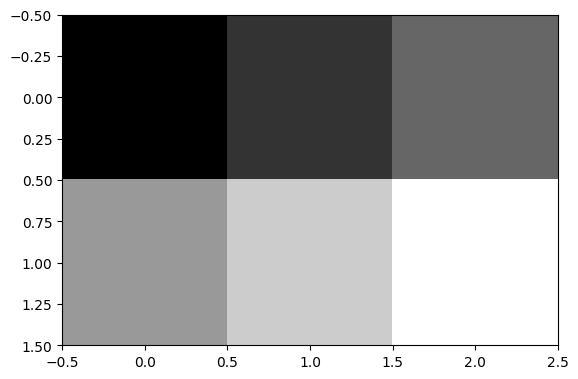

In [ ]:
x = np.array([[2,3,4],[5,6,7]])
plt.imshow(x, cmap = 'gray')

In [ ]:
print(x)

[[2 3 4]
 [5 6 7]]


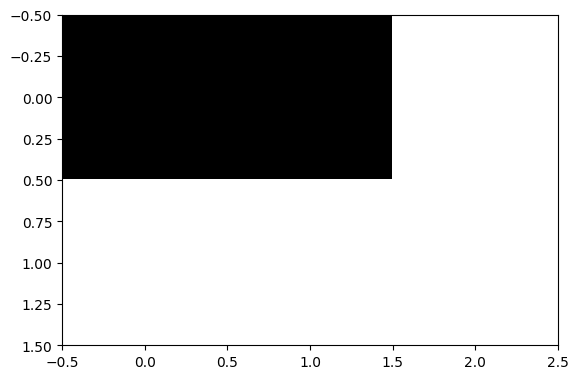

In [ ]:
threshold_value = 3
x_thresholded = (x > threshold_value).astype(int)

plt.imshow(x_thresholded, cmap = 'gray')

## Slicing Summary

`x[start:end:step] = [x[start], x[start+step], x[start+2*step], ... x[end-1]]`

If `start` not specified, assumes `0`

If `end` not specified, assumes `len(x)`

If `step` not specified, assumes `1`

**Boolean indexing**: `x[ind]` where `ind` is an array of `True` and `False` with the same size as `x`

In [ ]:
x = np.array([4, 1, -1, 2, 4, 5])
print(x[1:4]) # [1, -1, 2]
print(x[1:]) # [1, -1, 2, 4, 5]
print(x[:4]) # []
print(x[:]) # []
print(x[2::2]) # []
print(x[:6:2]) # []

[ 1 -1  2]
[ 1 -1  2  4  5]
[ 4  1 -1  2]
[ 4  1 -1  2  4  5]
[-1  4]
[ 4 -1  4]


# Image as NumPy array

In [ ]:
x = np.random.rand(4, 5)
print(x)
print("shape -", x.shape)

[[0.1379652  0.47736454 0.9664872  0.19855163 0.42730521]
 [0.47251073 0.38687454 0.62692222 0.44087299 0.61968043]
 [0.78560926 0.64975841 0.47479457 0.43735296 0.78146077]
 [0.54010195 0.0580201  0.96092983 0.5942977  0.28275078]]
shape - (4, 5)


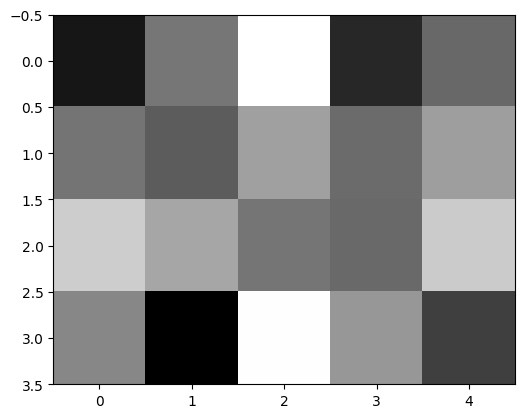

In [ ]:
plt.imshow(x, cmap='gray',)
# plt.axis("off")

In [ ]:
x.shape

(4, 5)

In [ ]:
#height, width = x.shape[:2]
height = x.shape[0]
width = x.shape[1]
print("Height =", height)
print("Width =", width)

Height = 4
Width = 5


In [ ]:
x = np.random.rand(4, 5, 3)
height, width, nchannels = x.shape
print("Height =", height)
print("Width =", width)
print("Number of channels =", nchannels)

Height = 4
Width = 5
Number of channels = 3


In [ ]:
print(x)

[[[0.77783967 0.06097216 0.43979214]
  [0.98074741 0.89450785 0.86655673]
  [0.04335408 0.96007296 0.39525022]
  [0.6270245  0.72868712 0.83325394]
  [0.71467937 0.47228556 0.48812155]]

 [[0.31426611 0.64477576 0.47883617]
  [0.62750112 0.79332744 0.76705603]
  [0.43693421 0.61505343 0.17830801]
  [0.65843872 0.96807855 0.02789608]
  [0.95354981 0.12529558 0.34628759]]

 [[0.99191531 0.86362583 0.20284599]
  [0.08130176 0.51795047 0.61794216]
  [0.4240978  0.23446777 0.73851852]
  [0.05631401 0.93647342 0.36316466]
  [0.63572404 0.81332635 0.94819949]]

 [[0.89895676 0.1874753  0.40643622]
  [0.24397798 0.64299223 0.75669331]
  [0.07767672 0.07119356 0.36634748]
  [0.0735826  0.46513889 0.96379898]
  [0.15719865 0.90835696 0.52123467]]]


In [ ]:
print("Red Channel")
print(x[:, :, 0])

print("Green Channel")
print(x[:, :, 1])

print("Blue Channel")
print(x[:, :, 2])

Red Channel
[[0.77783967 0.98074741 0.04335408 0.6270245  0.71467937]
 [0.31426611 0.62750112 0.43693421 0.65843872 0.95354981]
 [0.99191531 0.08130176 0.4240978  0.05631401 0.63572404]
 [0.89895676 0.24397798 0.07767672 0.0735826  0.15719865]]
Green Channel
[[0.06097216 0.89450785 0.96007296 0.72868712 0.47228556]
 [0.64477576 0.79332744 0.61505343 0.96807855 0.12529558]
 [0.86362583 0.51795047 0.23446777 0.93647342 0.81332635]
 [0.1874753  0.64299223 0.07119356 0.46513889 0.90835696]]
Blue Channel
[[0.43979214 0.86655673 0.39525022 0.83325394 0.48812155]
 [0.47883617 0.76705603 0.17830801 0.02789608 0.34628759]
 [0.20284599 0.61794216 0.73851852 0.36316466 0.94819949]
 [0.40643622 0.75669331 0.36634748 0.96379898 0.52123467]]


<ipython-input-54-e8f7f460afa6>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(x)


(-0.5, 4.5, 3.5, -0.5)

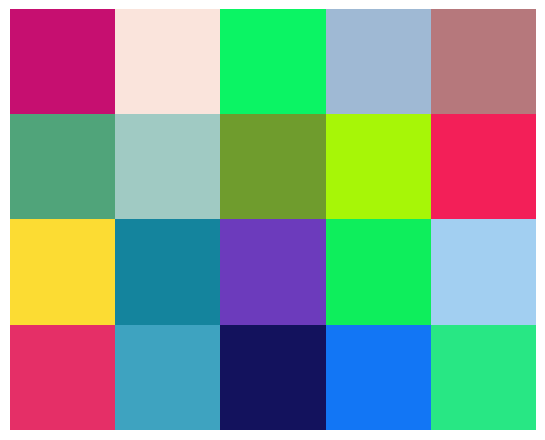

In [ ]:
io.imshow(x)
plt.axis("off")

<ipython-input-55-bcb6426642ed>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(x_cropped)


(-0.5, 2.5, 2.5, -0.5)

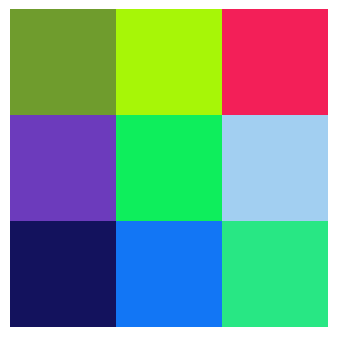

In [ ]:
plt.figure(figsize=(4, 4))
x_cropped = x[-3:,-3:,:]
io.imshow(x_cropped)
plt.axis("off")

# Real Digital Image

In [ ]:
I = io.imread("/content/sample_1.jpg")
height, width = I.shape[:2]
print("Height =", height)
print("Width =", width)

Height = 1200
Width = 940


In [ ]:
I.shape #checking channel here 3 means RGB

(1200, 940, 3)

<ipython-input-60-603bca30ff63>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(-0.5, 939.5, 1199.5, -0.5)

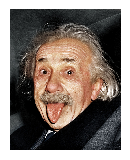

In [ ]:
plt.figure(figsize=(2,2))
io.imshow(I)
plt.axis("off")

In [ ]:
print(I)

[[[49 53 54]
  [51 55 56]
  [54 58 59]
  ...
  [68 68 66]
  [62 62 60]
  [61 61 59]]

 [[45 49 50]
  [47 51 52]
  [48 52 53]
  ...
  [68 68 66]
  [67 67 65]
  [69 69 67]]

 [[43 47 48]
  [44 48 49]
  [45 49 50]
  ...
  [68 68 66]
  [69 69 67]
  [70 70 68]]

 ...

 [[12 14 13]
  [ 8 10  9]
  [ 4  6  5]
  ...
  [ 8  9 11]
  [ 9 10 12]
  [ 9 10 12]]

 [[14 15 17]
  [ 8  9 11]
  [ 1  2  4]
  ...
  [12 13 17]
  [10 11 15]
  [10 11 15]]

 [[14 15 17]
  [ 6  7  9]
  [ 0  0  4]
  ...
  [11 12 17]
  [ 8  9 14]
  [ 7  8 13]]]


In [ ]:
print("Red Channel")
print(I[:, :, 0])

print("Green Channel")
print(I[:, :, 1])

print("Blue Channel")
print(I[:, :, 2])

Red Channel
[[49 51 54 ... 68 62 61]
 [45 47 48 ... 68 67 69]
 [43 44 45 ... 68 69 70]
 ...
 [12  8  4 ...  8  9  9]
 [14  8  1 ... 12 10 10]
 [14  6  0 ... 11  8  7]]
Green Channel
[[53 55 58 ... 68 62 61]
 [49 51 52 ... 68 67 69]
 [47 48 49 ... 68 69 70]
 ...
 [14 10  6 ...  9 10 10]
 [15  9  2 ... 13 11 11]
 [15  7  0 ... 12  9  8]]
Blue Channel
[[54 56 59 ... 66 60 59]
 [50 52 53 ... 66 65 67]
 [48 49 50 ... 66 67 68]
 ...
 [13  9  5 ... 11 12 12]
 [17 11  4 ... 17 15 15]
 [17  9  4 ... 17 14 13]]


In [ ]:
x = I[0, 0]
y = I[-1, 0]
print(x)
print(y)

[49 53 54]
[14 15 17]


In [ ]:
`print(type(x))

<class 'numpy.ndarray'>


## Problem with **uint8**

In [ ]:
x + y

array([63, 68, 71], dtype=uint8)

In [ ]:
# Bad way of normalization
# I = I/255

# Good way
I = img_as_float(I)
I = img_as_float(I)
print(I)

[[[0.19215686 0.20784314 0.21176471]
  [0.2        0.21568627 0.21960784]
  [0.21176471 0.22745098 0.23137255]
  ...
  [0.26666667 0.26666667 0.25882353]
  [0.24313725 0.24313725 0.23529412]
  [0.23921569 0.23921569 0.23137255]]

 [[0.17647059 0.19215686 0.19607843]
  [0.18431373 0.2        0.20392157]
  [0.18823529 0.20392157 0.20784314]
  ...
  [0.26666667 0.26666667 0.25882353]
  [0.2627451  0.2627451  0.25490196]
  [0.27058824 0.27058824 0.2627451 ]]

 [[0.16862745 0.18431373 0.18823529]
  [0.17254902 0.18823529 0.19215686]
  [0.17647059 0.19215686 0.19607843]
  ...
  [0.26666667 0.26666667 0.25882353]
  [0.27058824 0.27058824 0.2627451 ]
  [0.2745098  0.2745098  0.26666667]]

 ...

 [[0.04705882 0.05490196 0.05098039]
  [0.03137255 0.03921569 0.03529412]
  [0.01568627 0.02352941 0.01960784]
  ...
  [0.03137255 0.03529412 0.04313725]
  [0.03529412 0.03921569 0.04705882]
  [0.03529412 0.03921569 0.04705882]]

 [[0.05490196 0.05882353 0.06666667]
  [0.03137255 0.03529412 0.04313725]


<ipython-input-69-343cbace99fd>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(-0.5, 939.5, 1199.5, -0.5)

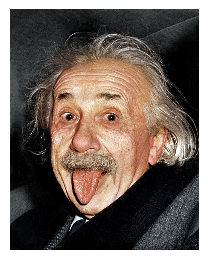

In [ ]:
plt.figure(figsize=(3, 3))
io.imshow(I)
plt.axis("off")

## Example 2

In [ ]:
I = io.imread("/content/sample_2.jpg")

In [ ]:
I.shape

(534, 800, 3)

In [ ]:
height, width, nchannels = I.shape
print("Height =", height)
print("Width =", width)
print("Number of channels =", nchannels)

Height = 534
Width = 800
Number of channels = 3


<ipython-input-73-f09a9d2539de>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


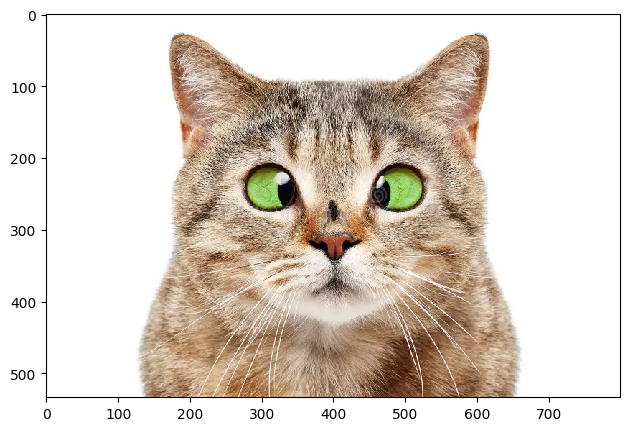

In [ ]:
io.imshow(I)

Text(0.5, 1.0, 'Blue')

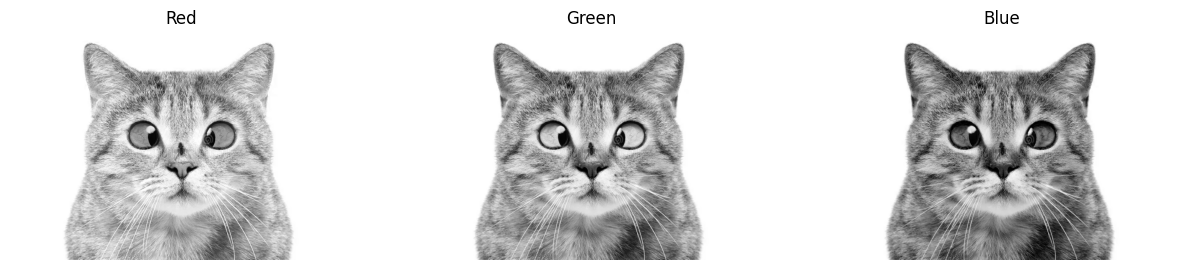

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axes[0].imshow(I[:, :, 0], cmap="gray")
axes[0].axis("off")
axes[0].set_title("Red")

# Green channel
axes[1].imshow(I[:, :, 1], cmap="gray")
axes[1].axis("off")
axes[1].set_title("Green")

# Blue channel
axes[2].imshow(I[:, :, 2], cmap="gray")
axes[2].axis("off")
axes[2].set_title("Blue")


In [ ]:
12//2

<ipython-input-75-669775b1cb23>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_cropped)


(-0.5, 399.5, 533.5, -0.5)

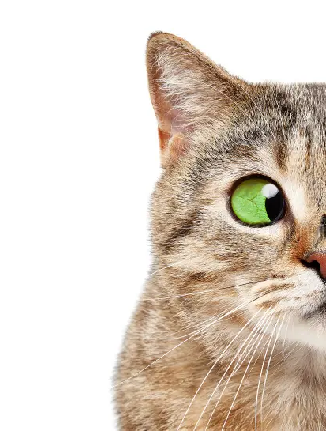

In [ ]:
# Only the left half of the image
I_cropped = I[:, :width//2, :]
io.imshow(I_cropped)
plt.axis("off")

<ipython-input-76-485821cf386a>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_cropped)


(-0.5, 799.5, 266.5, -0.5)

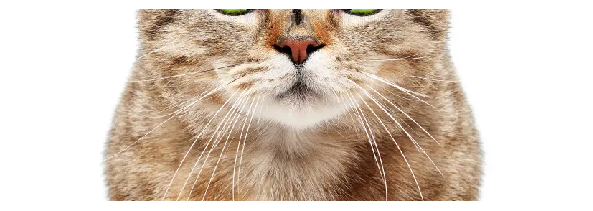

In [ ]:
# Only the  bottom half of the image
I_cropped = I[height//2:, :, :]
io.imshow(I_cropped)
plt.axis("off")

<ipython-input-77-aae892f51cbc>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_flipped)


(-0.5, 799.5, 533.5, -0.5)

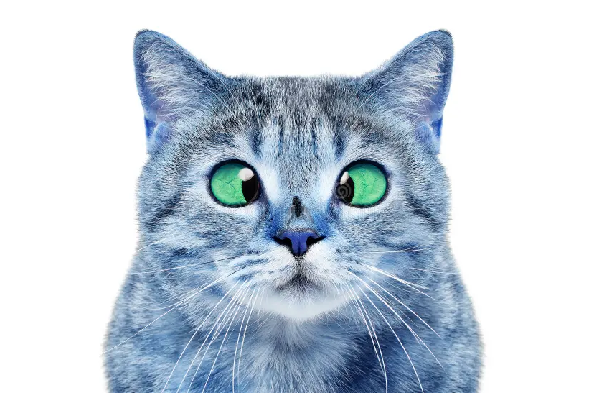

In [ ]:
# flip along width (with respect to y axis)
# I_flipped = I[:, ::-1, :]
I_flipped = I[:, :, ::-1]
io.imshow(I_flipped)
plt.axis("off")

<ipython-input-78-110d7843b53c>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_flipped)


(-0.5, 799.5, 533.5, -0.5)

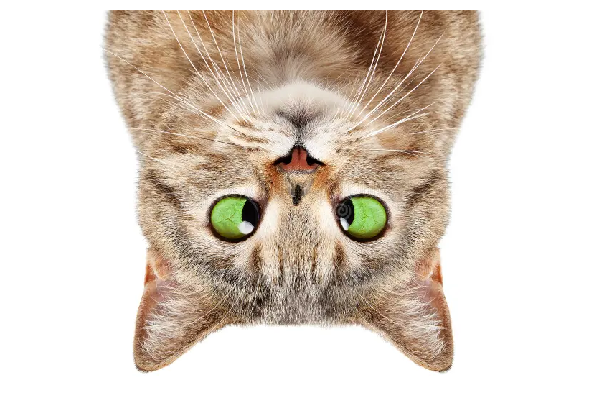

In [ ]:
# flip along height (with respect to x axis)
I_flipped = I[::-1, :, :]  #[ulta image,mirror image:]  if nwe put -1 there
io.imshow(I_flipped)
plt.axis("off")

<ipython-input-79-72daefe6f498>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_rotated)


(-0.5, 799.5, 533.5, -0.5)

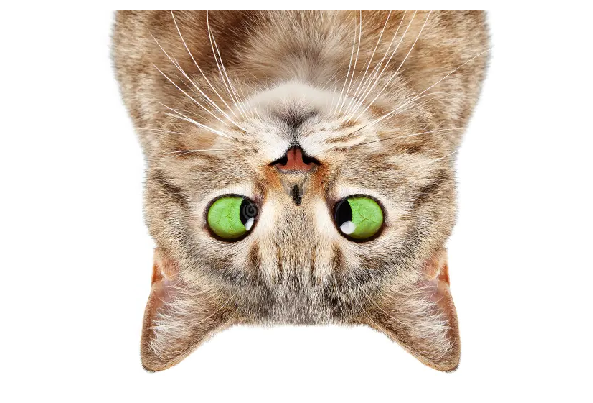

In [ ]:
# Rotate 180 degree
I_rotated = I[::-1, ::-1, :]
io.imshow(I_rotated)
plt.axis("off")

<ipython-input-80-038dff624094>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_rotated)


(-0.5, 9.5, 6.5, -0.5)

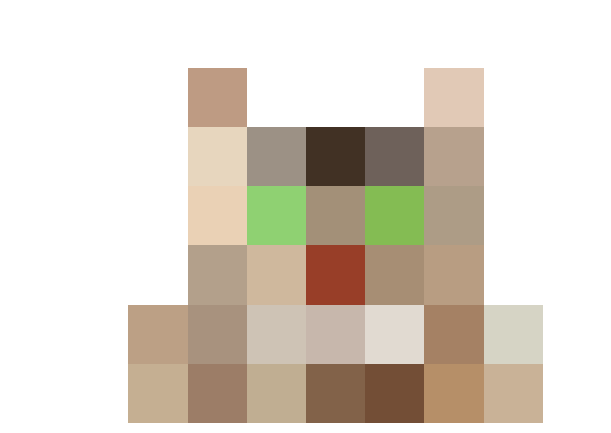

In [ ]:
# Downsample
I_rotated = I[::40*2, ::40*2, :]
io.imshow(I_rotated)
plt.axis("off")

<ipython-input-81-98838de35783>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_rotated)


(-0.5, 99.5, 66.5, -0.5)

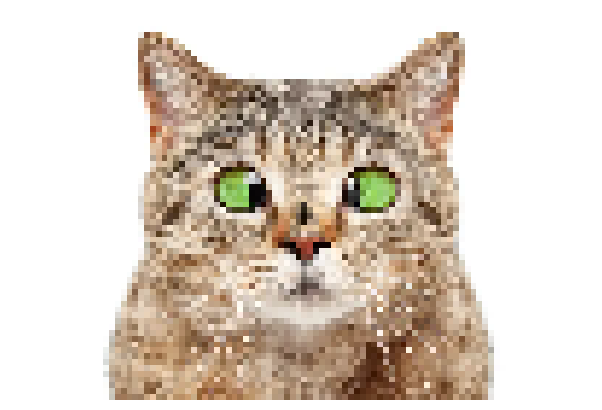

In [ ]:
# Downsample
I_rotated = I[::4*2, ::4*2, :]
io.imshow(I_rotated)
plt.axis("off")

# Example 3

In [ ]:
I = io.imread("/content/sample_3.png")

<ipython-input-83-f09a9d2539de>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


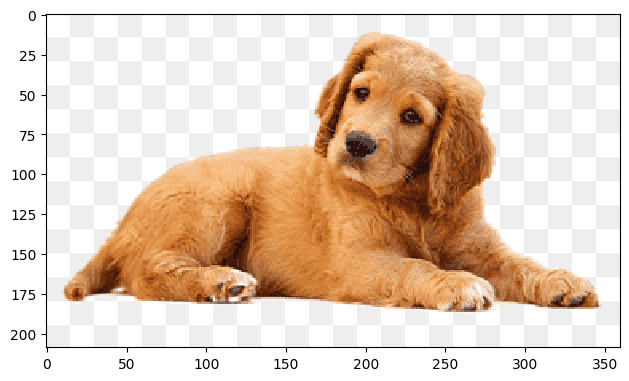

In [ ]:
io.imshow(I)

In [ ]:
I.shape

(209, 360, 3)

IndexError: index 3 is out of bounds for axis 2 with size 3

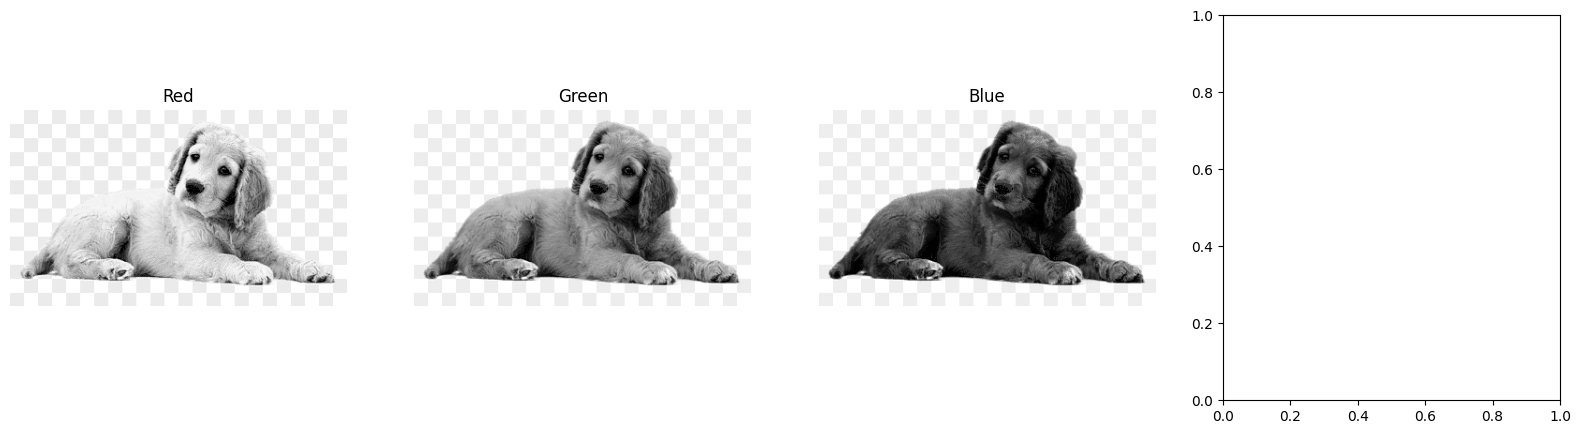

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Red channel
axes[0].imshow(I[:, :, 0], cmap="gray")
axes[0].axis("off")
axes[0].set_title("Red")

# Green channel
axes[1].imshow(I[:, :, 1], cmap="gray")
axes[1].axis("off")
axes[1].set_title("Green")

# Blue channel
axes[2].imshow(I[:, :, 2], cmap="gray")
axes[2].axis("off")
axes[2].set_title("Blue")

# Alpha channel
axes[3].imshow(I[:, :, 3], cmap="gray")
axes[3].axis("off")
axes[3].set_title("Alpha")


In [ ]:
#task

In [ ]:
I = io.imread("/content/task.jpg")
height, width, nchannels = I.shape
print("Height =", height)
print("Width =", width)
print("Number of channels =", nchannels)


Height = 750
Width = 1000
Number of channels = 3


<ipython-input-88-f09a9d2539de>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


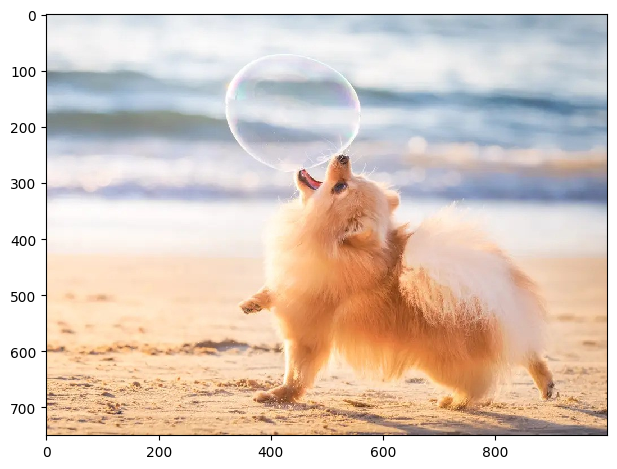

In [ ]:
io.imshow(I)

<ipython-input-90-58d9f56d0ff6>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_cropped)


(-0.5, 199.5, 149.5, -0.5)

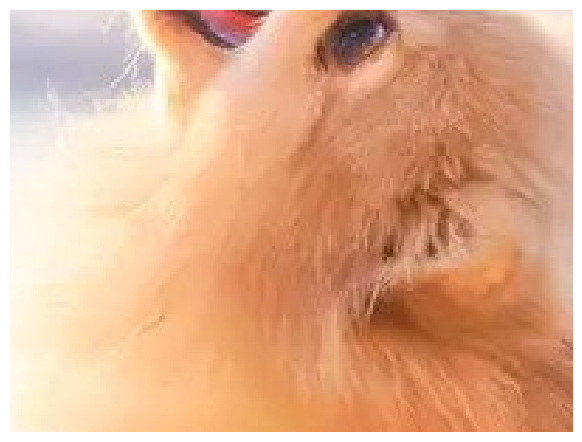

In [ ]:
I_cropped = I[300:-300, 400:-400, :]
io.imshow(I_cropped)
plt.axis("off")

<ipython-input-91-8d857c339ebc>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_cropped)


(-0.5, 199.5, 305.5, -0.5)

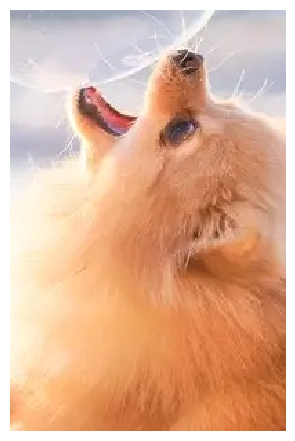

In [ ]:
I_cropped = I[222:-222, 400:-400, :]
io.imshow(I_cropped)
plt.axis("off")